In [2]:
import pandas as pd
import requests
import pprint
import json
import time
from pandas import json_normalize
import ast

pd.set_option('display.max_colwidth', None) ## 셀 최대 너비 제한 해제

#### Units 테이블을 이진수로 처리한뒤 클러스터링

##### units 테이블을 한글 번역한 버전의 테이블 불러오기

In [3]:
units_df = pd.read_csv('C:/Users/user/Documents/GitHub/Final-Project-A09-/유닛 조합과 별갯수 테이블.csv')

units_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameId         9288 non-null   object 
 1   game_datetime  9288 non-null   int64  
 2   game_length    9288 non-null   float64
 3   game_version   9288 non-null   object 
 4   puuid          9288 non-null   object 
 5   placement      9288 non-null   int64  
 6   last_round     9288 non-null   int64  
 7   level          9288 non-null   int64  
 8   시비르            9288 non-null   int64  
 9   리븐             9288 non-null   int64  
 10  쉔              9288 non-null   int64  
 11  탐 켄치           9288 non-null   int64  
 12  갈리오            9288 non-null   int64  
 13  카이사            9288 non-null   int64  
 14  사일러스           9288 non-null   int64  
 15  우디르            9288 non-null   int64  
 16  케일             9288 non-null   int64  
 17  케이틀린           9288 non-null   int64  
 18  렉사이     

##### 덱 클러스터링에서 기물의 유무만을 보기위해 시비르부터 자야까지 모든 컬럼의 값을 0 또는 1로 치환함

In [4]:
# 기존 데이터프레임을 뒤에서 join 해주기 위해 그대로 두어야하므로 복사하여 combination_clustering 변수에 할당

combination_clustering = units_df.copy()

# '시비르'부터 '자야'까지의 컬럼값이 0인 경우를 제외하고 모두 1로 변경

combination_clustering.loc[:, '시비르':'자야'] = combination_clustering.loc[:, '시비르':'자야'].applymap(lambda x: 0 if x == 0 else 1)
              # 시비르 컬럼부터 자야 컬럼까지 모든행을 선택                         # 선택한 모든 데이터(applymap)에 람다 함수를 적용
                                                                                 # 여기서 람다 함수는 x가 0이면 0 나머지는 1로 치환

# 작업 확인
combination_clustering.head()

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,코부코,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,1,1,...,0,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle"
1,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,1,40,9,0,0,...,0,0,0,0,0,0,0,0,0,"TFT11_Caitlyn, TFT11_RekSai, TFT11_Jax, TFT11_Aatrox, TFT11_Kindred, TFT11_Senna, TFT11_Gnar, TFT11_Ornn, TFT11_Azir"
2,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,4,34,9,0,0,...,0,0,0,0,0,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong"
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,0,...,0,0,0,0,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra"
4,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,6,28,8,0,1,...,0,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana"


##### elbow method 를 이용하여 적절한 클러스터 갯수 찾기

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

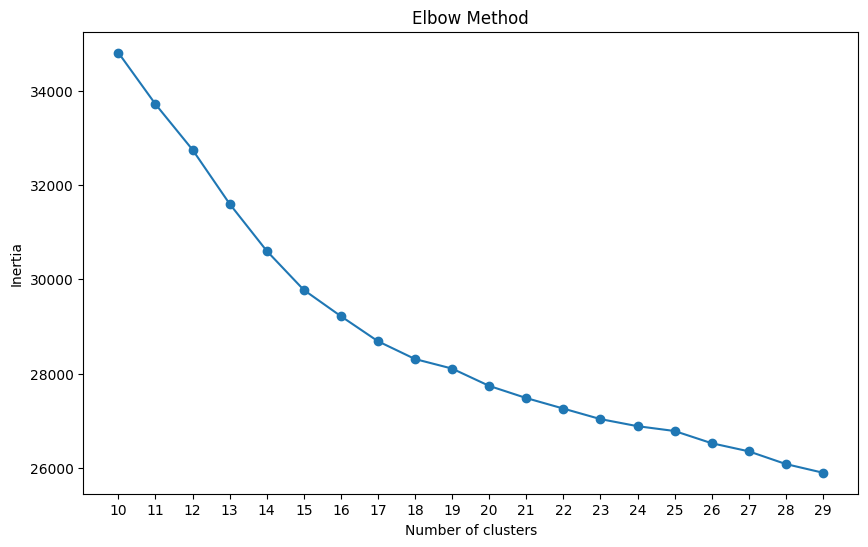

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 클러스터 개수 범위 설정
k_range = range(10, 30)  # 1부터 15까지의 클러스터 개수를 시도

# 챔피언 컬럼들로 사용할 이진 데이터 지정
binary_data = combination_clustering.loc[:, '시비르':'자야']  # 시비르 컬럼부터 자야 컬럼까지 모두 선택

# 각 클러스터 개수에 대한 K-means 모델을 적용하고 inertia 값을 저장
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(binary_data)
    inertia.append(kmeans.inertia_)

# 엘보우 메서드를 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_range)
plt.show()

##### 특정할만한 elbow point 를 찾지 못했으므로 직접 클러스터 갯수를 조정하면서 살펴봐야함

In [6]:

# 클러스터 개수
num_clusters = 19

# K-means 모델 생성
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# 이진 데이터
binary_data = combination_clustering.loc[:, '시비르':'자야']

# 모델 피팅
kmeans.fit(binary_data)

# 군집 결과 확인
clusters = kmeans.labels_
print("Clusters:", clusters)

# 각 데이터 포인트가 속한 클러스터를 데이터프레임에 추가
combination_clustering['cluster'] = clusters

# 클러스터링 결과 출력
combination_clustering.head(1)

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters: [12 13  3 ... 15  4 15]


,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,cluster
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,1,1,...,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",12


##### 클러스터한 결과를 직접 보면서 제대로 클러스터링이 되었는지 확인

In [7]:
combination_clustering[combination_clustering['cluster'] == 8]

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,cluster
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,0,...,0,0,0,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra",8
8,KR_7005408175,1711608635465,2161.773926,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,_tFZFQDxr3ipe-amA8IMZiUugmCq6rhTN9YrLPthGkJSnh1TbAB9j1v4_pUGvH7UWmwnNM_jUtDhAw,7,27,9,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Ornn, TFT11_Azir, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_KogMaw",8
21,KR_7005214080,1711588857166,2142.503418,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,4,35,9,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Hwei, TFT11_Annie, TFT11_Lillia, TFT11_Nautilus, TFT11_Alune, TFT11_Sett",8
48,KR_7005167344,1711578421069,2303.322510,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,GEvycnX2BCHPJvYWxovKW0UaUjBhJ1lzWQVjmlMG5_8oV83TMr8Id-HYx-TXt7maxBDPvdu-E9p9JQ,1,38,9,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Hwei, TFT11_Annie, TFT11_Lillia, TFT11_KogMaw, TFT11_Nautilus, TFT11_Alune",8
57,KR_7005148547,1711573358335,2478.215088,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,GEvycnX2BCHPJvYWxovKW0UaUjBhJ1lzWQVjmlMG5_8oV83TMr8Id-HYx-TXt7maxBDPvdu-E9p9JQ,4,34,8,0,0,...,0,0,0,1,0,0,0,0,"TFT11_Sylas, TFT11_Ornn, TFT11_Annie, TFT11_Lillia, TFT11_KogMaw, TFT11_Nautilus, TFT11_Alune, TFT11_ChoGath",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9231,KR_7005684144,1711623964112,2058.914551,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,-S04F86zKO5ObAOX_M30nq25xP_6hzTTGb15Tk4hvYtgWOPulFM5yXM5pk-BiKbxoFJI0kauX6q9jg,7,27,8,0,0,...,0,0,0,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Azir, TFT11_Hwei, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra, TFT11_Nautilus",8
9243,KR_7005424380,1711609896840,2197.604492,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,xnxvKLJnL-YpEsxx9B4KlG3r2hJ7aMHhszPfw_bAGGf35bnV5Y3Q5YIXJhQEied1dcFUNz_Q0vPrnQ,6,29,8,0,0,...,0,0,0,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_RekSai, TFT11_Azir, TFT11_Annie, TFT11_Lillia, TFT11_Nautilus, TFT11_Alune",8
9250,KR_7005390721,1711608049453,2270.504395,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,ZjvngH7LQ0krpHg7jnqGF2CvygnVx6Gd1peaHN4wSR4zO-81SPzHFMiPXcSMcKiDVY_ngVrwzAoYmA,6,29,9,0,0,...,0,0,0,1,0,0,0,0,"TFT11_TahmKench, TFT11_Udyr, TFT11_Annie, TFT11_Lillia, TFT11_Irelia, TFT11_KogMaw, TFT11_Nautilus, TFT11_Alune, TFT11_ChoGath",8
9262,KR_7005363791,1711606106897,2313.740234,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,hdnBcaPa5FAMi0KgkeI1RGt4Vi77UiKkCeoeP-CyAsDGsTnklErNKqofGwqNcLpJ78Q3gJwH9Buw0A,4,34,9,0,0,...,0,0,0,1,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Azir, TFT11_Annie, TFT11_Lillia, TFT11_KogMaw, TFT11_Nautilus, TFT11_Alune, TFT11_ChoGath",8


#### 생각보다 제대로 클러스터링이 되지 않았음을 확인, 챔피언 컬럼을 0과 1로 치환하지 않고 시도

##### 챔피언 컬럼을 0과 1로 치환하기 전의 데이터 프레임 사용

##### 엘보우 포인트 확인

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

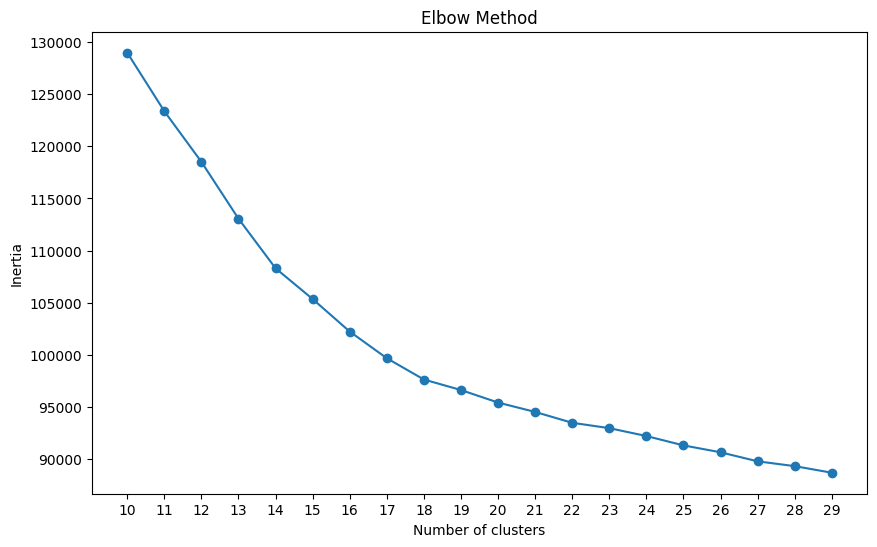

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 클러스터 개수 범위 설정
k_range = range(10, 30)  # 1부터 15까지의 클러스터 개수를 시도

# 챔피언 컬럼들로 사용할 이진 데이터 지정
binary_data = units_df.loc[:, '시비르':'자야']  # 시비르 컬럼부터 자야 컬럼까지 모두 선택

# 각 클러스터 개수에 대한 K-means 모델을 적용하고 inertia 값을 저장
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(binary_data)
    inertia.append(kmeans.inertia_)

# 엘보우 메서드를 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-') 
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_range)
plt.show()

##### 마찬가지로 정확한 엘보우 포인트는 생성되지않지만 그나마 8이 적당하다고 보임

##### 클러스터 갯수를 8로 설정하고 Kmeans 클러스터링 진행

##### 역시 원하는 대로 클러스터링 되지않았으므로 K 값을 임의로 변경하면서 시도

In [9]:

# 클러스터 개수
num_clusters = 19

# K-means 모델 생성
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# 이진 데이터
binary_data = units_df.loc[:, '시비르':'자야']

# 모델 피팅
kmeans.fit(binary_data)

# 군집 결과 확인
clusters = kmeans.labels_
print("Clusters:", clusters)

# 각 데이터 포인트가 속한 클러스터를 데이터프레임에 추가
units_df['unit_based_cluster'] = clusters

# 클러스터링 결과 출력
units_df.head(1)

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters: [ 5 16 18 ...  0  6  0]


,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,unit_based_cluster
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,2,2,...,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",5


##### 동일하게 각 클러스터 안의 데이터를 직접 확인하는 것으로 확인

In [10]:
units_df[units_df['unit_based_cluster'] == 4]

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,시비르,리븐,...,다리우스,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,unit_based_cluster
129,KR_7004880295,1711551758190,2093.943604,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,sV7rWaPHoFjEfvl08t9S7g6GXaExIb_mFB5zJnjxrnpyz194sQ9cPmMXEmDMKxih5iWucZRngigxPA,4,31,9,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Shen, TFT11_Sylas, TFT11_Udyr, TFT11_Caitlyn, TFT11_Aatrox, TFT11_Kayn, TFT11_Illaoi, TFT11_Ashe, TFT11_Sett",4
164,KR_7006600541,1711689509034,2229.056885,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,_IY835rbIl6HKaHXfA-6aB0g11VikVvxChAdCR5-jBNH5HuU7TY1J5nl6rcH03axnSUK6lXiez2tmQ,6,34,8,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Shen, TFT11_Ornn, TFT11_Diana, TFT11_WuKong, TFT11_Lissandra, TFT11_Morgana, TFT11_Kayn, TFT11_Illaoi",4
175,KR_7006271996,1711645190050,2155.204346,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,tvrulWGLrA7Au-z6OZlh_jAe60ij5TsBuKKdl7tCoUFIrOrdDtnglUgm70IWVSsvHLPgBbi8LXAsLQ,5,31,8,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Sylas, TFT11_Aatrox, TFT11_Lissandra, TFT11_Morgana, TFT11_Yone, TFT11_Kayn, TFT11_Illaoi, TFT11_Amumu",4
176,KR_7006062589,1711636746325,2161.084473,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,uX0wt6-Ul8Wj7PNUBWL1d-Wz2GL9PjRGe0RyaIZ9ldE0WR7r0N1-EtIjEXh3SXo9RVz3EDa0WVp57w,6,29,8,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Shen, TFT11_Kaisa, TFT11_Caitlyn, TFT11_Aatrox, TFT11_Ornn, TFT11_Morgana, TFT11_Kayn, TFT11_Illaoi",4
179,KR_7006062589,1711636746325,2161.084473,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,fzlOsXyGsMz_yYNGchFD6Brbov2DF4cQUrxgtyY6ctPEV88cc_M1h_imhzBPckCo61nbHYivt5Ctzw,3,34,8,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Sylas, TFT11_Aatrox, TFT11_Lissandra, TFT11_Morgana, TFT11_Yone, TFT11_Kayn, TFT11_Illaoi, TFT11_Amumu",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9118,KR_7006394956,1711657305086,2323.898926,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,uuI59p5iPANTUIkyNlQIJ2G50fLs23Ga_gWOcO2_lKe9XV2Ys1Qy4PvPazhmzHjI4l6I-PDQ-iYqQQ,8,28,8,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Shen, TFT11_Aatrox, TFT11_Rakan, TFT11_WuKong, TFT11_Morgana, TFT11_Kayn, TFT11_Illaoi, TFT11_Yorick",4
9157,KR_7006276854,1711645286364,2079.588135,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,AjJINQgCzShdsXkGzdZ078wTh9zPWPvVp_h0Y5z98dS7r_JFZQcJaWojhLB5ou3GaXoEUh9ZDLD0Jw,2,36,9,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Shen, TFT11_Sylas, TFT11_Udyr, TFT11_Aatrox, TFT11_Kindred, TFT11_Janna, TFT11_WuKong, TFT11_Morgana, TFT11_Yone, TFT11_Kayn",4
9226,KR_7005684144,1711623964112,2058.914551,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,VHpMbXHJPuFIcW0D5tNOxunFuLlVESmlA01601NM2vKjinIhGrFqse6SrIfpQmh8ksABRz3omG1nkw,4,30,8,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Shen, TFT11_Aatrox, TFT11_Diana, TFT11_WuKong, TFT11_Morgana, TFT11_Kayn, TFT11_LeeSin, TFT11_Illaoi",4
9247,KR_7005424380,1711609896840,2197.604492,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,VHpMbXHJPuFIcW0D5tNOxunFuLlVESmlA01601NM2vKjinIhGrFqse6SrIfpQmh8ksABRz3omG1nkw,1,38,9,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Shen, TFT11_Udyr, TFT11_Aatrox, TFT11_Hwei, TFT11_Morgana, TFT11_Kayn, TFT11_Illaoi, TFT11_Volibear, TFT11_Lux",4


##### 0 과 1로 치환한 데이터보다는 정확성이 높은것으로 보이지만 역시나 제대로 클러스터링되지않음

##### 챔피언 컬럼으로 클러스터링하는 것이 무리가 있다고 판단됨

##### 컬럼수가 조금더 적고 확실한 기준이 될수 있는 시너지(traits) 데이터 프레임으로 시도해볼 필요가 있음

#### traits 테이블 불러오기

In [11]:
traits_df = pd.read_csv('C:/Users/user/Documents/GitHub/Final-Project-A09-/시너지 테이블.csv')

traits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9288 entries, 0 to 9287
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameId         9288 non-null   object 
 1   game_datetime  9288 non-null   int64  
 2   game_length    9288 non-null   float64
 3   game_version   9288 non-null   object 
 4   puuid          9288 non-null   object 
 5   placement      9288 non-null   int64  
 6   last_round     9288 non-null   int64  
 7   level          9288 non-null   int64  
 8   이타심            9288 non-null   int64  
 9   거대 괴수          9288 non-null   int64  
 10  난동꾼            9288 non-null   int64  
 11  귀인             9288 non-null   int64  
 12  혼령             9288 non-null   int64  
 13  먹그림자           9288 non-null   int64  
 14  신화             9288 non-null   int64  
 15  정령 주술사         9288 non-null   int64  
 16  이야기꾼           9288 non-null   int64  
 17  재주꾼            9288 non-null   int64  
 18  암영      

##### 기존 Units 테이블로 Kmeans Clustering 한 결과와 비교해서 보기위해 traits 테이블에 컬럼 추가

In [12]:
# units_df 데이터프레임에서 필요한 컬럼 선택

selected_columns = units_df[['Combination', 'unit_based_cluster']]

# traits_df와 units_df의 선택된 컬럼을 결합

traits_clustering = pd.merge(traits_df, selected_columns, how='left', left_index=True, right_index=True)

# 결합된 데이터프레임 출력

traits_clustering

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,이타심,거대 괴수,...,호걸,천계,연인,현자,비전 마법사,행운,도자기,결투가,Combination,unit_based_cluster
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,0,1,...,0,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",5
1,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,1,40,9,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Caitlyn, TFT11_RekSai, TFT11_Jax, TFT11_Aatrox, TFT11_Kindred, TFT11_Senna, TFT11_Gnar, TFT11_Ornn, TFT11_Azir",16
2,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,4,34,9,1,1,...,1,1,1,1,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong",18
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,1,...,0,0,1,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra",11
4,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,6,28,8,0,1,...,0,0,0,2,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana",12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,KR_7005139736,1711571877752,2173.421143,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,sMD7iMyWZ2ztcGvcYyXf92yYF6ui0ipF8UInDkKm6wMnJc7abC_rkU3WJokvCuiO4Rln3ltQCc3xTw,4,33,10,2,0,...,1,1,1,1,0,0,1,1,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong, TFT11_Lissandra, TFT11_LeeSin, TFT11_Irelia",1
9284,KR_7005139736,1711571877752,2173.421143,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,4W5dMgFaI2qWXtzftLCjec16RypS_e_0BaHIynnzUApIEjpzmow5edpCgoq2Z7R4wwe8AhejYgf_sw,3,34,9,1,1,...,1,1,1,2,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Rakan, TFT11_WuKong, TFT11_Morgana",18
9285,KR_7005139736,1711571877752,2173.421143,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,m-WJmbLS17zaoDDdN1NjqRMGuXkZChReSv8-36lQ32zgt2-TJU4Noj7CY246rk6qA0WmYVOE4kTogQ,1,37,8,0,1,...,0,0,0,0,2,0,2,0,"TFT11_Lissandra, TFT11_Illaoi, TFT11_Ashe, TFT11_Lux, TFT11_Amumu, TFT11_Syndra, TFT11_Aphelios, TFT11_Thresh",0
9286,KR_7005139736,1711571877752,2173.421143,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,eJBg1EVkQRS4fXbZKDAkyuQuYzL-kF1Ps7NOxHuwiAQ29VZgBEi20Je7sbVtqV-m-Y6ArWw2Hck5Iw,6,28,8,0,0,...,0,0,0,0,0,0,0,0,"TFT11_Shen, TFT11_Caitlyn, TFT11_Jax, TFT11_Aatrox, TFT11_Senna, TFT11_Morgana, TFT11_Kayn, TFT11_Illaoi",6


##### 마찬가지로 traits 컬럼을 이용하여 클러스터링하기 위해 엘보우 메서드 적용

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

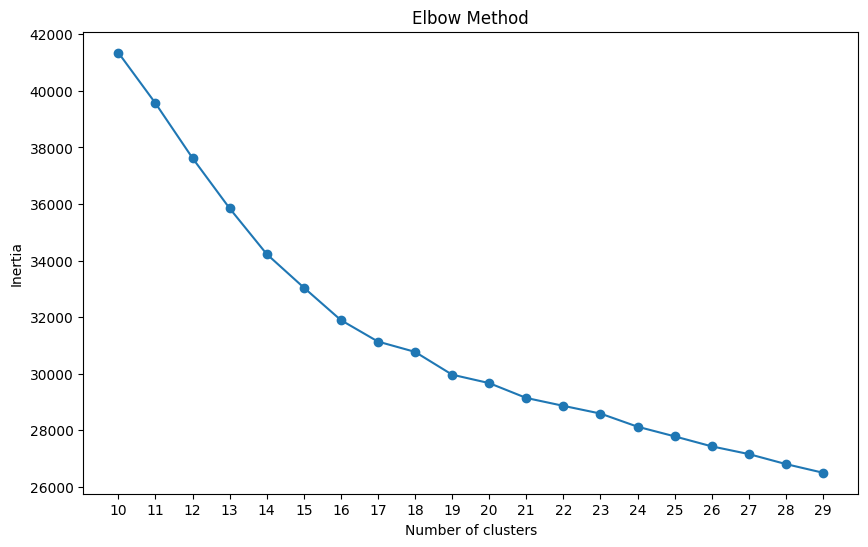

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 클러스터 개수 범위 설정
k_range = range(10, 30)  # 1부터 15까지의 클러스터 개수를 시도

# 챔피언 컬럼들로 사용할 이진 데이터 지정
binary_data = traits_clustering.loc[:, '이타심':'결투가']  # 이타심부터 결투가까지 모든 시너지 컬럼 선택

# 각 클러스터 개수에 대한 K-means 모델을 적용하고 inertia 값을 저장
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(binary_data)
    inertia.append(kmeans.inertia_)

# 엘보우 메서드를 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-') 
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_range)
plt.show()

##### 8이나 9 지점을 엘보우 포인트로 볼수는 있으나 크게 적절하지는 않아보임

##### K 값을 8, 9로 설정하여 클러스터링 진행

In [14]:
# 클러스터 개수 설정
num_clusters = 19

# K-means 모델 생성
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# 이진 데이터
binary_data = traits_clustering.loc[:, '이타심':'결투가']

# 모델 피팅
kmeans.fit(binary_data)

# 군집 결과 확인
clusters = kmeans.labels_
print("Clusters:", clusters)

# 각 데이터 포인트가 속한 클러스터를 데이터프레임에 추가
traits_clustering['traits_based_cluster'] = clusters

# 클러스터링 결과 출력
traits_clustering.head()

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters: [13 18 11 ...  4  9 16]


,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,이타심,거대 괴수,...,천계,연인,현자,비전 마법사,행운,도자기,결투가,Combination,unit_based_cluster,traits_based_cluster
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,0,1,...,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",5,13
1,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,1,40,9,0,0,...,0,0,0,0,0,0,0,"TFT11_Caitlyn, TFT11_RekSai, TFT11_Jax, TFT11_Aatrox, TFT11_Kindred, TFT11_Senna, TFT11_Gnar, TFT11_Ornn, TFT11_Azir",16,18
2,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,4,34,9,1,1,...,1,1,1,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong",18,11
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,1,...,0,1,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra",11,15
4,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,6,28,8,0,1,...,0,0,2,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana",12,3


##### 동일하게 8개의 군집으로 나누었을 때 클러스터링 결과가 꽤 차이나는 것을 확인 가능

##### 동일한 방식으로 클러스터링 적절한지 수동으로 체크

In [15]:
traits_clustering[traits_clustering['traits_based_cluster'] == 2]

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,이타심,거대 괴수,...,천계,연인,현자,비전 마법사,행운,도자기,결투가,Combination,unit_based_cluster,traits_based_cluster
7,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,yAVc-bTbi86qYF3ePtvTr0DTW367seRmnhXqPLIMwmw9xLZWbrw9uIX2wSTodseM41RIG-UnnGajOw,3,35,9,1,0,...,0,1,1,0,0,0,1,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Janna, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong, TFT11_LeeSin, TFT11_Irelia",1,2
28,KR_7005190828,1711586217976,2181.769775,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,g7czitIBfBrL6554DeXJpZ_id1_2n0Cyzu0r0tTC__bQCfvKGWSoZN0vEWlNgfdIJGZ0HRODPhdKMA,6,32,9,1,0,...,0,1,2,0,0,0,1,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Janna, TFT11_Diana, TFT11_Rakan, TFT11_WuKong, TFT11_Zyra, TFT11_LeeSin, TFT11_Volibear",12,2
39,KR_7005187292,1711583884188,2441.186035,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Qd68F2UMKe7FMb-qpbUs3njG6k_4ZLwr2FRG0zHruSDr9XTtZOZ1cdAXyLd_kGAt0_IheL5QMQLdvQ,7,24,9,1,0,...,0,1,1,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Kayle, TFT11_Janna, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong, TFT11_Annie, TFT11_Zyra, TFT11_LeeSin",17,2
64,KR_7005131948,1711570762652,2378.553223,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,PDEcFJx7ZoWmThh882YMZsU6lfuQ51jYuFqVssWjsdtyD1EbrorT_MCEe852xPiw-FQRE5NIlxTq3Q,4,31,9,1,0,...,1,0,0,0,0,0,1,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Janna, TFT11_Soraka, TFT11_Hwei, TFT11_WuKong, TFT11_LeeSin, TFT11_Irelia, TFT11_Nautilus",1,2
70,KR_7005131948,1711570762652,2378.553223,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,nRyOO54JqNYwFDYO7AtKcKZtbAWaNRyz1yIA0xRsJoRIF5faHM3uPGr59o9O9velaaOBiEMYR51CXw,7,27,9,1,0,...,1,1,0,0,0,0,1,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Janna, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong, TFT11_LeeSin, TFT11_Irelia",1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9161,KR_7006221919,1711642754121,2263.403076,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,yA3sYdHOcsdXeK4xPpU8x07LGKc7nbvF3txQ7kh9GmLTMVs8uXdFz0oYXhrR37nUAQjrCWfiLRhZZw,4,35,9,3,0,...,1,1,1,0,0,0,1,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong, TFT11_LeeSin, TFT11_Irelia",1,2
9179,KR_7006124847,1711639106091,2434.725098,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,NvzsqUqWJNQCJkc7eOrQgpnM1b1xp3nflVOQuldScg7N5Vb4IY-3qpiJK9QpF7fE_WqTNUGoHFKunQ,6,29,9,2,0,...,0,0,1,0,0,0,1,"TFT11_Riven, TFT11_TahmKench, TFT11_Kayle, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Zyra, TFT11_LeeSin, TFT11_Irelia, TFT11_Nautilus",12,2
9240,KR_7005424380,1711609896840,2197.604492,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,Rvxnx50Ays8x11tzLXIAsi3JFe4i9K_FS9XNsll7e7DkGzKgKp_tBsdAQGH_NqlpOYVxNk_g42ybLA,7,28,9,2,0,...,0,1,1,1,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Soraka, TFT11_Diana, TFT11_Rakan, TFT11_Lissandra, TFT11_Morgana, TFT11_Kayn, TFT11_Zoe, TFT11_LeeSin",12,2
9246,KR_7005424380,1711609896840,2197.604492,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,NcRZkvKiN_XFIemorK2Q9dgmTvVNSeH_Q71SNvjRAbXnA7ps2h9LWd3L2oiqmwoLUPc2ygNDTA9Xhg,8,27,9,1,0,...,0,1,1,0,0,0,1,"TFT11_Riven, TFT11_Galio, TFT11_Kayle, TFT11_Azir, TFT11_Janna, TFT11_Diana, TFT11_Rakan, TFT11_WuKong, TFT11_LeeSin, TFT11_Irelia",1,2


In [16]:
##### traits 에 가중치를 줘야하나 (traits 값에 로그 스케일링)? 보통 3번째 시너지까지 켜야지 그 다음 시너지를 문장을 만들어서 키거나 하니까
##### 바꿔서 말하면 3시너지까지는 가중치를 점점 높게 주고 3시너지와 4시너지는 가중치를 적게준다?
##### 혹은 모든 특성을 보면서 키기 어려운지 쉬운지에 따라서 나름대로의 가중치를 책정한다?

##### 랭커들의 데이터이므로 덱의 유동성이 조금더 높을 것을 고려

##### 클러스터의 갯수를 늘려보고자 생각함 최소 10개 이상으로

##### 유닛 테이블과 시너지 테이블을 모두 사용해서 클러스터링 진행 시도

##### 마지막 클러스터링 테이블을 복사해서 유닛 컬럼을 붙여주고 새로운 테이블 생성

##### 먼저 필요한 데이터들만 슬라이싱

In [17]:
units_and_traits_clustering = traits_df.loc[:, :'결투가']

In [18]:
comparison = traits_clustering.loc[:, 'Combination':]

In [19]:
only_units_column = combination_clustering.loc[:, '시비르':'자야']

##### 슬라이싱한 데이터 프레임들을 원하는 순서대로 병합

In [20]:
units_and_traits_clustering = pd.concat([units_and_traits_clustering, only_units_column, comparison], axis=1)

units_and_traits_clustering.head()

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,이타심,거대 괴수,...,아펠리오스,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,unit_based_cluster,traits_based_cluster
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,0,1,...,0,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",5,13
1,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,1,40,9,0,0,...,0,0,0,0,0,0,0,"TFT11_Caitlyn, TFT11_RekSai, TFT11_Jax, TFT11_Aatrox, TFT11_Kindred, TFT11_Senna, TFT11_Gnar, TFT11_Ornn, TFT11_Azir",16,18
2,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,4,34,9,1,1,...,0,0,0,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong",18,11
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,1,...,0,0,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra",11,15
4,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,6,28,8,0,1,...,0,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana",12,3


##### 새로 생성한 테이블의 유닛과 시너지 부분을 모두 사용하여 엘보우 메서드 적용

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

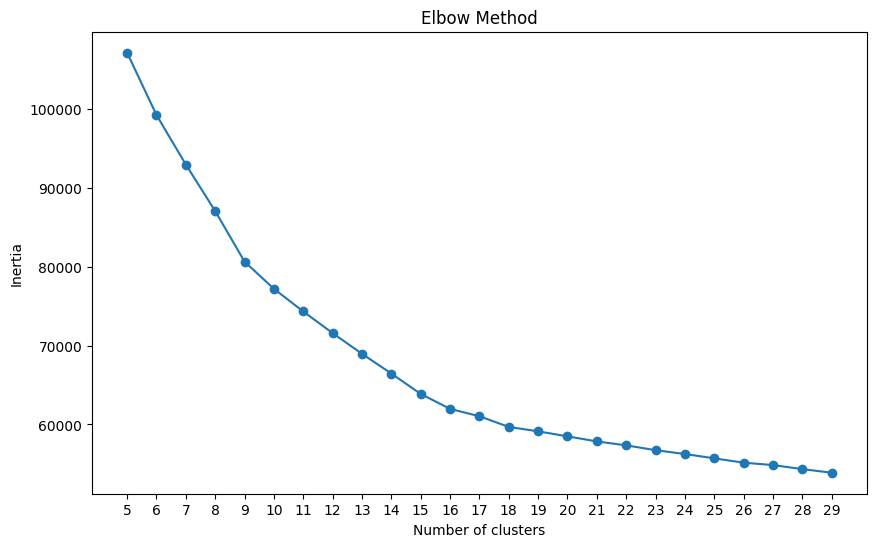

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 클러스터 개수 범위 설정
k_range = range(5, 30)  # 1부터 15까지의 클러스터 개수를 시도

# 챔피언 컬럼들로 사용할 이진 데이터 지정
binary_data = units_and_traits_clustering.loc[:, '이타심':'자야']  # 이타심부터 결투가까지 모든 시너지 컬럼 선택

# 각 클러스터 개수에 대한 K-means 모델을 적용하고 inertia 값을 저장
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(binary_data)
    inertia.append(kmeans.inertia_)

# 엘보우 메서드를 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-') 
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_range)
plt.show()

##### 대략 포인트가 9에서 한번 16에서 한번?..

##### 각각의 K값으로 클러스터링 실행

In [22]:
# 클러스터 개수 설정
num_clusters = 16

# K-means 모델 생성
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# 이진 데이터
binary_data = units_and_traits_clustering.loc[:, '이타심':'자야']

# 모델 피팅
kmeans.fit(binary_data)

# 군집 결과 확인
clusters = kmeans.labels_
print("Clusters:", clusters)

# 각 데이터 포인트가 속한 클러스터를 데이터프레임에 추가
units_and_traits_clustering['units_and_traits_cluster'] = clusters

# 클러스터링 결과 출력
units_and_traits_clustering.head()

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clusters: [ 1 15 12 ...  6  4  6]


,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,이타심,거대 괴수,...,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,unit_based_cluster,traits_based_cluster,units_and_traits_cluster
0,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BWLn3nfAuki-3ju22n-ni5exBESPlXaPsyF9bZ3uFeuvr1ks-ZL6B7x3SA_KVt_kNrHRfsg6VVk9YQ,7,28,8,0,1,...,0,0,0,0,0,0,"TFT11_Sivir, TFT11_Riven, TFT11_Shen, TFT11_TahmKench, TFT11_Galio, TFT11_Kaisa, TFT11_Sylas, TFT11_Udyr, TFT11_Kayle",5,13,1
1,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,mptEuTzeZ2MWsLxe4KfwLTr2iJp2uUphE7maw8CwGfeeFKXOVZ0_E8GccCzgNUfy0wiRJ1BGd1LOGQ,1,40,9,0,0,...,0,0,0,0,0,0,"TFT11_Caitlyn, TFT11_RekSai, TFT11_Jax, TFT11_Aatrox, TFT11_Kindred, TFT11_Senna, TFT11_Gnar, TFT11_Ornn, TFT11_Azir",16,18,15
2,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,iM__viRIlCBc3VBF9p0BK9a58MsQTrB6Svi4asmtcw4vxkVZgPWgAB3ZY98VJHwbV2YhWUTzZr_XEQ,4,34,9,1,1,...,0,0,0,0,0,0,"TFT11_Udyr, TFT11_Ornn, TFT11_Azir, TFT11_Janna, TFT11_Soraka, TFT11_Diana, TFT11_Hwei, TFT11_Rakan, TFT11_WuKong",18,11,12
3,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,XwRIqTXBnBYgAU3Jct9FIDtrIOy01HBn4PUM6BecUex8D2MRFJlhDu2fcAvohMYPQrRGJK65ccfeCQ,8,27,9,0,1,...,0,0,0,0,0,0,"TFT11_TahmKench, TFT11_Sylas, TFT11_Udyr, TFT11_Ornn, TFT11_Hwei, TFT11_Rakan, TFT11_Annie, TFT11_Lillia, TFT11_Lissandra",11,15,0
4,KR_7005435650,1711611092537,2339.676514,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,bAUTBjhuA00n1167MUmonjyMgetU3Dv1-5IGNUqWwWt-59C4f_W2hhtPLqZ5KQTNdoQCjExuuGszZg,6,28,8,0,1,...,0,0,0,0,0,0,"TFT11_Riven, TFT11_Galio, TFT11_Udyr, TFT11_Kayle, TFT11_Ornn, TFT11_Janna, TFT11_Diana, TFT11_Zyra, TFT11_Morgana",12,3,10


##### 나뉜 군집 확인

In [23]:
units_and_traits_clustering[units_and_traits_clustering['units_and_traits_cluster'] == 6]

,gameId,game_datetime,game_length,game_version,puuid,placement,last_round,level,이타심,거대 괴수,...,쓰레쉬,초가스,말파이트,가렌,티모,자야,Combination,unit_based_cluster,traits_based_cluster,units_and_traits_cluster
14,KR_7005408175,1711608635465,2161.773926,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,sV7rWaPHoFjEfvl08t9S7g6GXaExIb_mFB5zJnjxrnpyz194sQ9cPmMXEmDMKxih5iWucZRngigxPA,2,37,8,0,0,...,0,0,0,0,0,0,"TFT11_Soraka, TFT11_Neeko, TFT11_Zoe, TFT11_Illaoi, TFT11_Ahri, TFT11_Lux, TFT11_Amumu, TFT11_Syndra",10,4,6
31,KR_7005190828,1711586217976,2181.769775,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,BLKLr0C6Px7qhf5vNe5jyzYIK2h_QRO2T69teeCtMMU8rGEAV3ZK2hpKlZemnjl1Q6Ti5XnY5G1lRw,7,30,9,0,0,...,1,0,0,0,0,0,"TFT11_WuKong, TFT11_Lissandra, TFT11_Morgana, TFT11_Neeko, TFT11_Illaoi, TFT11_Ahri, TFT11_Lux, TFT11_Syndra, TFT11_Thresh",10,4,6
35,KR_7005187292,1711583884188,2441.186035,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,M6OtnT2Ad4fhM9Sj1fh1odtr0p4oO6rqxc6qtW_lPlrkX8wfqUm-LMYHb_SRi56T8-X0npFDIZj9GQ,1,42,9,0,1,...,1,0,0,0,0,0,"TFT11_Shen, TFT11_Yone, TFT11_Illaoi, TFT11_Ashe, TFT11_Sett, TFT11_Amumu, TFT11_Syndra, TFT11_Aphelios, TFT11_Thresh",0,16,6
37,KR_7005187292,1711583884188,2441.186035,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,J4dU0B12knMrwwAjOdZXFN7f7jugj2q89pTyW5uacJA8FISzZBjhQzsMcIzhGTpBwY_KJgBtzvxktg,8,23,7,0,1,...,1,0,0,0,0,0,"TFT11_Shen, TFT11_Illaoi, TFT11_Ashe, TFT11_Amumu, TFT11_Syndra, TFT11_Aphelios, TFT11_Thresh",0,16,6
58,KR_7005148547,1711573358335,2478.215088,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,-ZAFS1urDSmWcoepY07pQX98dNTD14cKAJdFXKITAgZzlcKpqDK8eiHPz5Uq0zD3iz6Kb7tZjKbMcg,2,42,9,0,0,...,1,0,0,0,0,0,"TFT11_Caitlyn, TFT11_Lissandra, TFT11_Illaoi, TFT11_Nautilus, TFT11_Sett, TFT11_Amumu, TFT11_Syndra, TFT11_Aphelios, TFT11_Thresh",0,16,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9264,KR_7005336302,1711603214529,2313.343262,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,pxW91Tf6sM6c0K6pokqlNvQxd7hXPK6b2JWFxk_g59RCLMU_SpPKtxjFrBwf6skllUKdOqdi-qWCww,8,24,7,0,0,...,0,0,0,0,0,0,"TFT11_Neeko, TFT11_Zoe, TFT11_Illaoi, TFT11_Ashe, TFT11_Lux, TFT11_Amumu, TFT11_Syndra",10,4,6
9272,KR_7005149778,1711574024327,2346.074707,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,9JZGeeVqrgA-moylAQrH0sQdgEfxGNDhHD3gd3MygvGRlUpaHChAWHiiMOmaDbFDOtMEKPsWmfzlwA,7,27,8,0,1,...,1,0,0,0,0,0,"TFT11_Ornn, TFT11_Lissandra, TFT11_Illaoi, TFT11_Ashe, TFT11_Amumu, TFT11_Syndra, TFT11_Aphelios, TFT11_Thresh",0,16,6
9281,KR_7005139736,1711571877752,2173.421143,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,isHLordKTqogFpqDZ5fCHX8FsKdAPFLYZxPVb5-MeQuXV7qtso5qhL2bYU7ay4L3cU6pGoPgetcYXw,7,27,8,0,0,...,0,0,0,0,0,0,"TFT11_Lissandra, TFT11_Illaoi, TFT11_Nautilus, TFT11_Sett, TFT11_Ahri, TFT11_Lux, TFT11_Amumu, TFT11_Syndra",10,4,6
9285,KR_7005139736,1711571877752,2173.421143,Version 14.6.570.6276 (Mar 25 2024/14:00:15) [PUBLIC] <Releases/14.6>,m-WJmbLS17zaoDDdN1NjqRMGuXkZChReSv8-36lQ32zgt2-TJU4Noj7CY246rk6qA0WmYVOE4kTogQ,1,37,8,0,1,...,1,0,0,0,0,0,"TFT11_Lissandra, TFT11_Illaoi, TFT11_Ashe, TFT11_Lux, TFT11_Amumu, TFT11_Syndra, TFT11_Aphelios, TFT11_Thresh",0,4,6


In [24]:
units_and_traits_clustering['units_and_traits_cluster'].value_counts()

units_and_traits_cluster
12    1098
6      782
4      779
8      689
10     633
0      606
7      606
9      588
3      588
1      508
14     477
13     463
11     400
2      376
15     350
5      345
Name: count, dtype: int64

In [28]:
units_and_traits_clustering.to_csv('특성과 챔피언 컬럼 붙인 테이블.csv', index=False)

units_and_traits_clustering['이타심'].unique()

array([0, 1, 2, 3], dtype=int64)